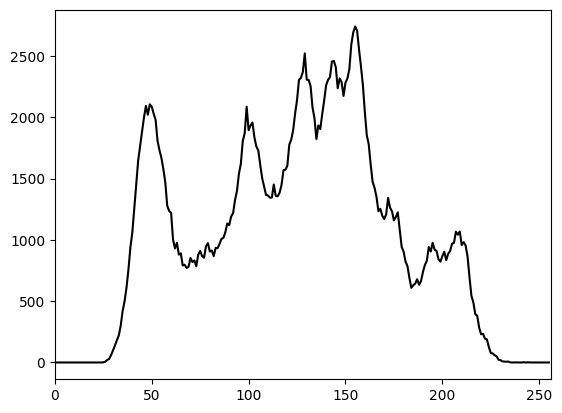

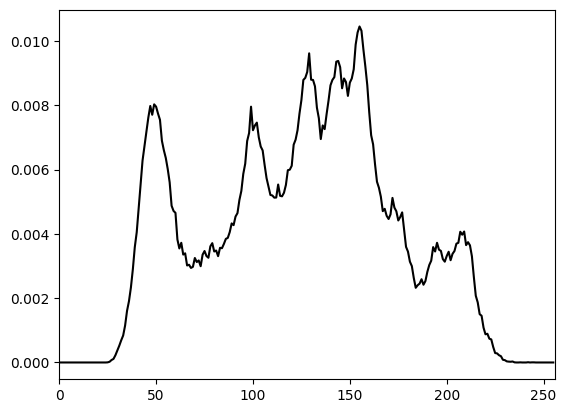

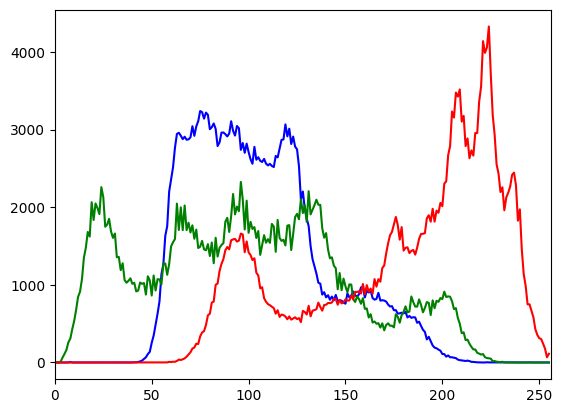

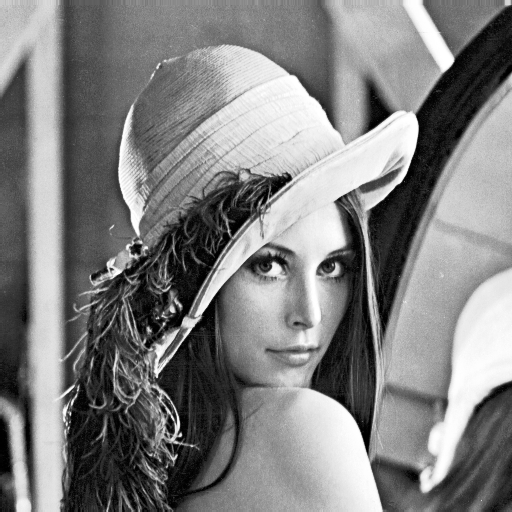

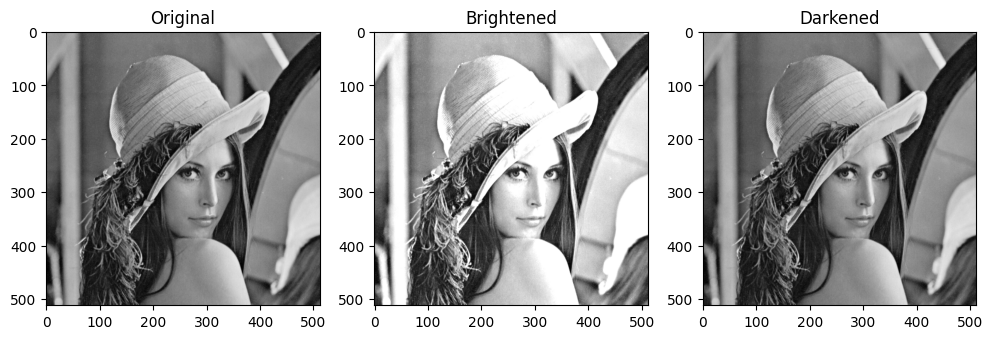

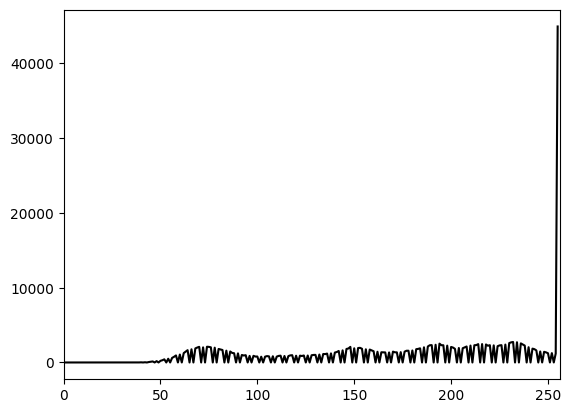

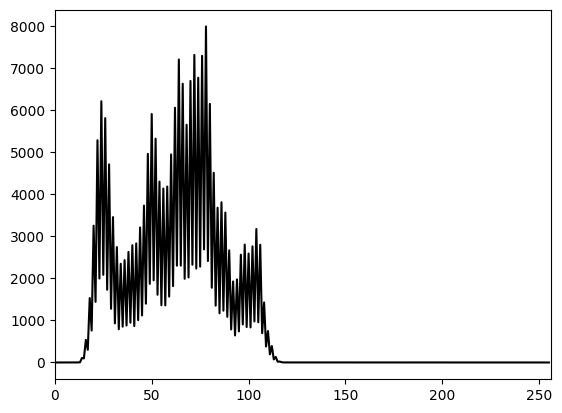

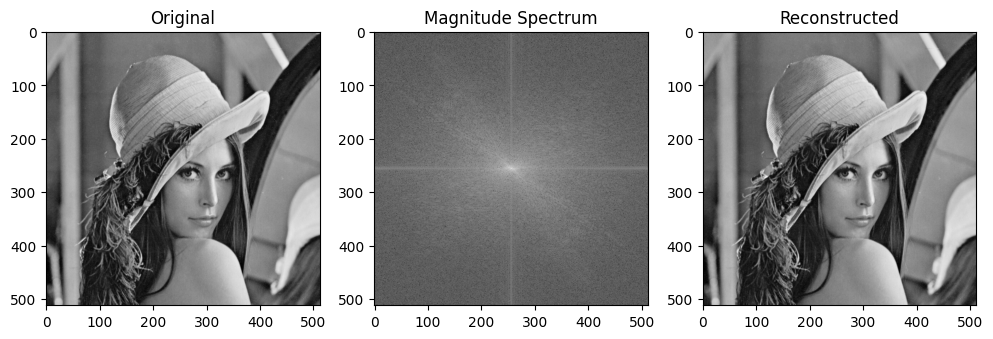

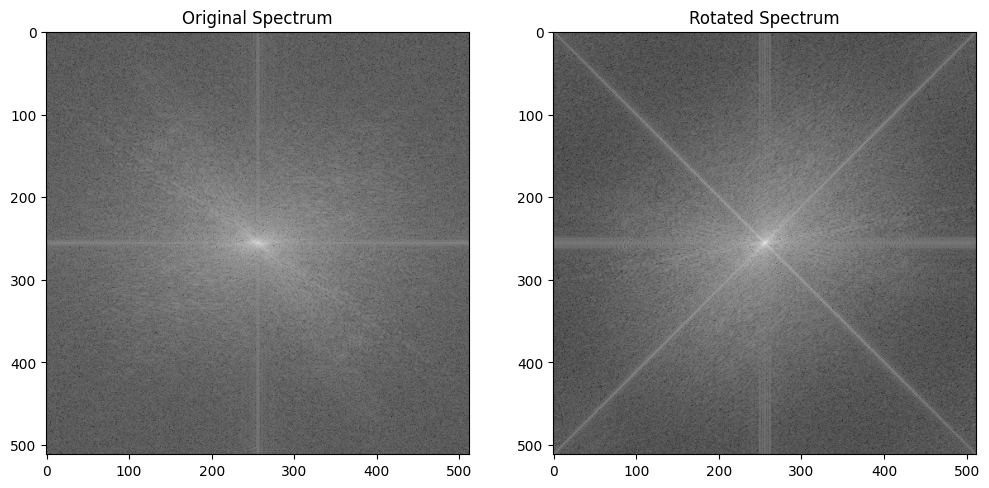

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_histogram(image, color=False, normalize=False):
    if color:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            if normalize:
                hist /= hist.sum()
            plt.plot(hist, color=col)
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        if normalize:
            hist /= hist.sum()
        plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def adjust_brightness(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft_shift, magnitude_spectrum

def inverse_fft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(dft_ishift)
    img_back = np.abs(img_back)
    return img_back

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated


color_img = cv2.imread('Lena.png')
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)


compute_histogram(gray_img)
compute_histogram(gray_img, normalize=True)
compute_histogram(color_img, color=True)

equalized_img = histogram_equalization(gray_img)
cv2_imshow(equalized_img)


bright_img = adjust_brightness(gray_img, 1.5)
dark_img = adjust_brightness(gray_img, 0.5)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(bright_img, cmap='gray'), plt.title('Brightened')
plt.subplot(133), plt.imshow(dark_img, cmap='gray'), plt.title('Darkened')
plt.show()

compute_histogram(bright_img)
compute_histogram(dark_img)

# Task 2: FFT and IFFT
fft_result, mag_spectrum = compute_fft(gray_img)
reconstructed_img = inverse_fft(fft_result)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(mag_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(reconstructed_img, cmap='gray'), plt.title('Reconstructed')
plt.show()

# Verify Rotation Property
rotated_img = rotate_image(gray_img, 45)
_, rotated_mag_spectrum = compute_fft(rotated_img)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(mag_spectrum, cmap='gray'), plt.title('Original Spectrum')
plt.subplot(122), plt.imshow(rotated_mag_spectrum, cmap='gray'), plt.title('Rotated Spectrum')
plt.show()
